In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from src.data.dataset import SliderDataset
from src.data.data_module import SliderDataModule
import matplotlib.pyplot as plt
import seaborn as sns

dm = SliderDataModule(
    data_dir="../data/raw",
    batch_size=128,
    num_workers=8,
    normalize=False,
    maxlen=312,
    use_cnn=True,
    iter_over_cols=False
)

dm.setup_subset("dev", "00") 

print(len(dm.active_subsets['train']))
dm.active_subsets['train'][0]

/opt/conda/lib/python3.8/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: /opt/conda/lib/python3.8/site-packages/torchvision/image.so: undefined symbol: _ZN5torch3jit17parseSchemaOrNameERKNSt7__cxx1112basic_stringIcSt11char_traitsIcESaIcEEE
  warn(f"Failed to load image Python extension: {e}")


KeyboardInterrupt: 

In [18]:
from src.models.cnn_ae import CNNAE
from src.data.data_module import SliderDataModule
import pytorch_lightning as pl
import torch
import torch.nn as nn
from torchsummary import summary
from pytorch_lightning.loggers import TensorBoardLogger

dm = SliderDataModule(
    data_dir="../data/raw",
    batch_size=128,
    num_workers=8,
    normalize=False,
    maxlen=312,
    use_cnn=True,
    iter_over_cols=False
)

models = {}
for machine_id in dm.machine_ids["dev"][:1]:
    dm.setup_subset("dev", machine_id) 
    model = CNNAE(shape_preflatten=(64, 14, 3), z_dim=2048)
    # print(summary(model.cuda(), input_size=dm.active_subsets['train'][0]['input'].shape))

    early_stopping = pl.callbacks.EarlyStopping('val/loss', patience=20, min_delta=0.5)
    callbacks = [early_stopping]
    logger = TensorBoardLogger("lightning_logs/", name="CNNAE-per-machine", sub_dir=machine_id, version=1)

    trainer = pl.Trainer(accelerator="gpu", devices=1,
                        callbacks=callbacks, max_epochs=200,
                        log_every_n_steps=1,
                        logger=logger)
    print(f"Fitting a model for machine {machine_id}")
    trainer.fit(model, datamodule=dm)
    models[f"dev_{machine_id}"] = model

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 5.8 M 
1 | decoder | Decoder | 5.8 M 
2 | loss_fn | MSELoss | 0     
------------------------------------
11.6 M    Trainable params
0         Non-trainable params
11.6 M    Total params
46.415    Total estimated model params size (MB)


Fitting a model for machine 00


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/opt/conda/lib/python3.8/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:611: UserWarning: Checkpoint directory lightning_logs/CNNAE-per-machine/version_1/checkpoints exists and is not empty.
  rank_zero_warn(f"Checkpoint directory {dirpath} exists and is not empty.")
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 5.8 M 
1 | decoder | Decoder | 5.8 M 
2 | loss_fn | MSELoss | 0     
------------------------------------
11.6 M    Trainable params
0         Non-trainable params
11.6 M    Total params
46.415    Total estimated model params size (MB)


Fitting a model for machine 02


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 5.8 M 
1 | decoder | Decoder | 5.8 M 
2 | loss_fn | MSELoss | 0     
------------------------------------
11.6 M    Trainable params
0         Non-trainable params
11.6 M    Total params
46.415    Total estimated model params size (MB)


Fitting a model for machine 04


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

In [4]:
import numpy as np
from tqdm.notebook import tqdm
import torch
import torch.nn as nn
from sklearn.metrics import roc_auc_score


y_pred = []
y_test = []
mse = nn.MSELoss(reduction="none")
for machine_id in dm.machine_ids["dev"][:]:
    print(f"Reconstruction on test set for machine {machine_id}")
    model = models[f"dev_{machine_id}"]
    model = model.cuda().eval()
    dm.setup_subset("dev", machine_id)
    
    
    for batch in tqdm(dm.test_dataloader()):
        x_test = batch['input'].cuda()
        labels = np.array(batch['label'])
        y_test.append(np.where(labels == "anomaly", 1, 0))
        with torch.no_grad():
            x_recon = model(x_test)
            y_pred.append(mse(x_recon, x_test).mean(dim=(1,2,3)))

y_pred = torch.cat(y_pred).cpu().numpy()
y_test = np.concatenate(y_test)
roc_auc_score(y_test, y_pred, max_fpr=0.1)

Reconstruction on test set for machine 00


  0%|          | 0/4 [00:00<?, ?it/s]

Reconstruction on test set for machine 02


  0%|          | 0/3 [00:00<?, ?it/s]

Reconstruction on test set for machine 04


  0%|          | 0/3 [00:00<?, ?it/s]

0.5672733644348074

normal ../data/raw/dev_data/dev_data/slider/test/normal_id_04_00000022.wav
tensor(17.8631, device='cuda:0')


<AxesSubplot:>

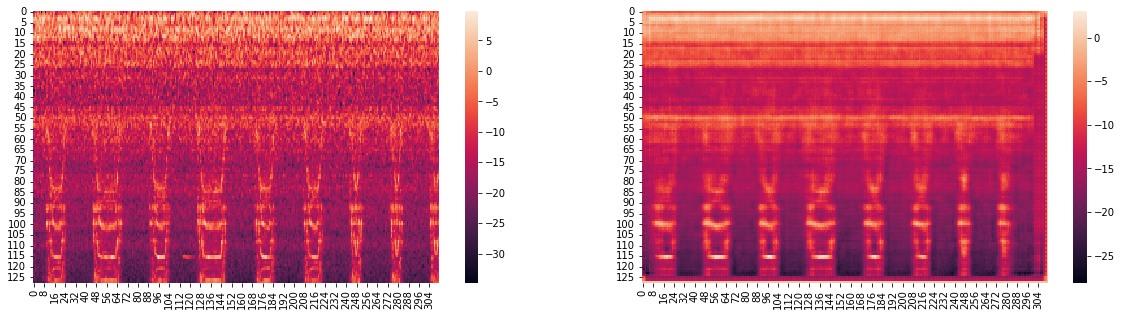

In [17]:
sample = dm.subsets['dev_test_04'][200]
print(sample["label"], sample["path"])
x_test = sample['input'].unsqueeze(0).cuda()
with torch.no_grad():
    x_recon = model(x_test)
    x_test = x_test.squeeze()
    x_recon = x_recon.squeeze()
    print(nn.MSELoss()(x_test, x_recon))
idx = 20
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))
sns.heatmap(x_test.cpu().T, ax=axs[0])
sns.heatmap(x_recon.cpu().T, ax=axs[1])

In [85]:
import os

y_pred = []
y_test = []
fnames = []
predict_loader = dm.predict_dataloader()
mse = nn.MSELoss(reduction="none")
for batch in tqdm(predict_loader):
    x_test = batch['input'].cuda()
    labels = np.array(batch['label'])
    y_test.append(np.where(labels == "anomaly", 1, 0))
    fnames.extend([os.path.basename(n) for n in batch["path"]])
    with torch.no_grad():
        x_recon = model(x_test)
        y_pred.append(mse(x_recon, x_test).mean(dim=(1,2,3)))
y_pred = torch.cat(y_pred).cpu().numpy()

100%|██████████| 7/7 [00:04<00:00,  1.52it/s]


In [86]:
import pandas as pd

df = pd.DataFrame({"file_name": fnames, "anomaly_score": y_pred})
df

,file_name,anomaly_score
0,id_01_00000000.wav,23.180538
1,id_01_00000001.wav,17.933529
2,id_01_00000002.wav,24.778660
3,id_01_00000003.wav,17.820473
4,id_01_00000004.wav,23.825981
...,...,...
829,id_05_00000273.wav,19.333549
830,id_05_00000274.wav,20.546436
831,id_05_00000275.wav,19.724346
832,id_05_00000276.wav,19.242035


In [87]:
df.to_csv("submission.csv", index=False)

In [91]:
!mkdir -p ~/.kaggle
!echo '{"username":"minhduc0711","key":"98f75e2eccf6861a19dd0459c34910d9"}' >> ~/.kaggle/kaggle.json

In [92]:
!kaggle competitions submit -c eurecom-aml-2022-challenge-2 -f submission.csv -m "cnn-based autoencoder"

100%|██████████████████████████████████████| 23.5k/23.5k [00:00<00:00, 47.2kB/s]
Successfully submitted to EURECOM AML 2022:: Challenge 2